**1. Import the necessary libraries**

In [37]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats


**2. Read the data as a data frame** 

In [38]:
MetaData=pd.read_csv("insurance (2).csv")

**3. Perform basic EDA which should include the following  and print out your insights at every step**

**a. Shape of the data**

In [39]:

"""
This gives all columns names(attributes) and total count of records
"""
MetaData.shape

(1338, 7)

**b. Data type of each attribute**


In [40]:
MetaData.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object


**c. Checking the presence of missing values**

In [41]:
"""
There are no missing values as count of each attribute is coming Zero
"""
MetaData.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

**d. 5 point summary of numerical attribute**

In [42]:
MetaData.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


**e. Distribution of ‘bmi’, ‘age’ and ‘charges’ columns.**

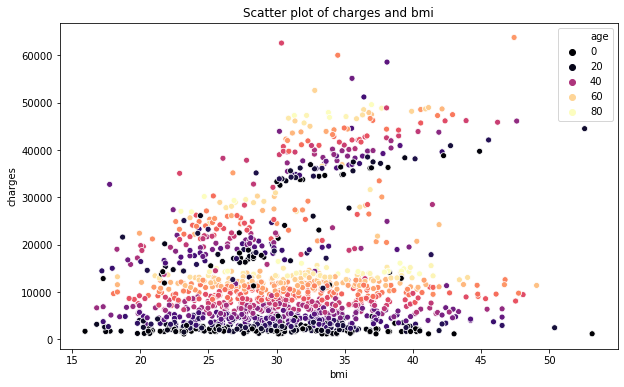

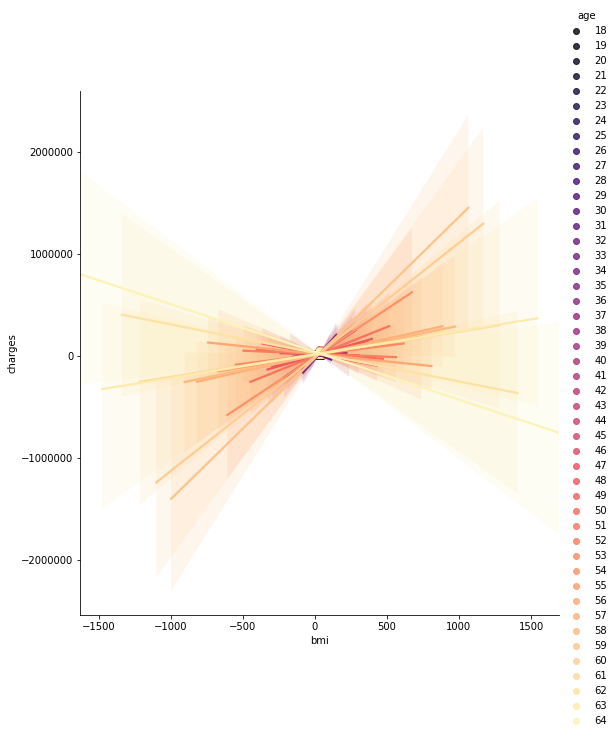

In [43]:
plt.figure(figsize=(10,6))
ax = sns.scatterplot(x='bmi',y='charges',data=MetaData,palette='magma',hue='age')
ax.set_title('Scatter plot of charges and bmi')

sns.lmplot(x="bmi", y="charges", hue="age", data=MetaData, palette = 'magma', height = 8)



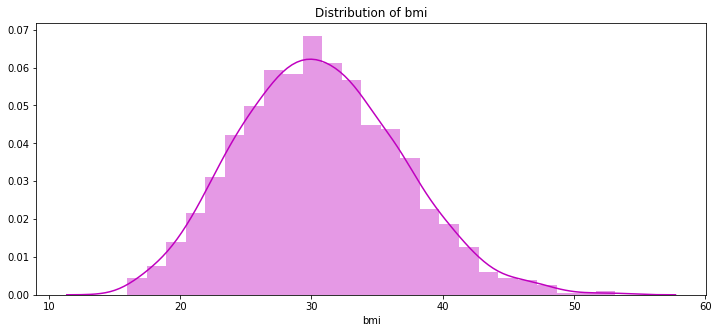

In [44]:
"""
Individual distibution of BMI
"""
plt.figure(figsize=(12,5))
plt.title("Distribution of bmi")
ax = sns.distplot(MetaData["bmi"], color = 'm')

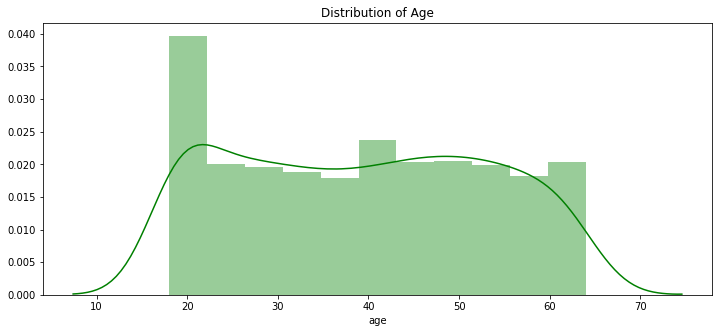

In [45]:
"""
Individual distibution of Age
"""
plt.figure(figsize=(12,5))
plt.title("Distribution of Age")
ax = sns.distplot(MetaData["age"], color = 'g')

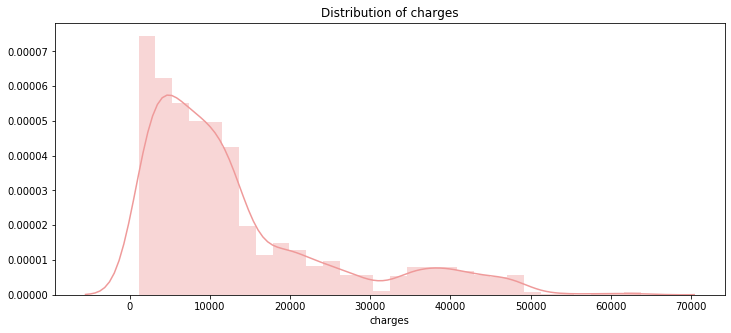

In [46]:
"""
Individual distibution of Charges
"""
plt.figure(figsize=(12,5))
plt.title("Distribution of charges")
ax = sns.distplot(MetaData["charges"], color = '#EF9A9A')

**f. Measure of skewness of ‘bmi’, ‘age’ and ‘charges’  columns**

In [47]:
MetaDataSelectedParamsSkewness=MetaData[['bmi','age','charges']]
MetaDataSelectedParamsSkewness.skew(axis=0,skipna=True,numeric_only=True)

bmi        0.284047
age        0.055673
charges    1.515880
dtype: float64

**g. Checking the presence of outliers in ‘bmi’, ‘age’ and  ‘charges columns**

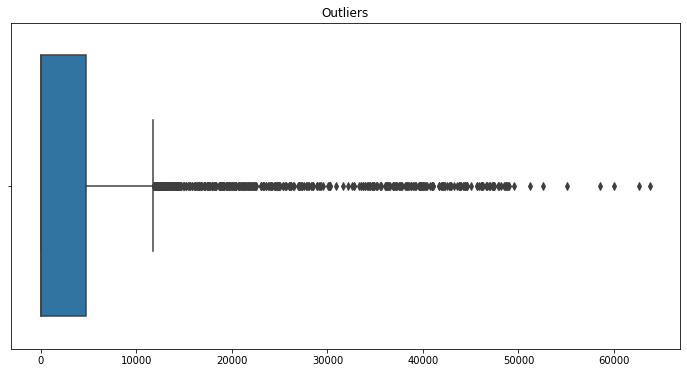

In [48]:
"""
This is combined representation of all three columns
"""
plt.figure(figsize=(12,6))
plt.title("Outliers")
sns.boxplot(MetaData[['bmi','age','charges']])

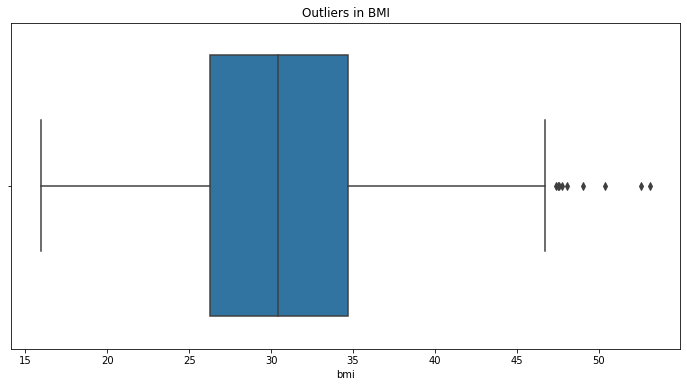

In [49]:

"""
Outliers in BMI
"""
plt.figure(figsize=(12,6))
plt.title("Outliers in BMI")
sns.boxplot(MetaData['bmi'])

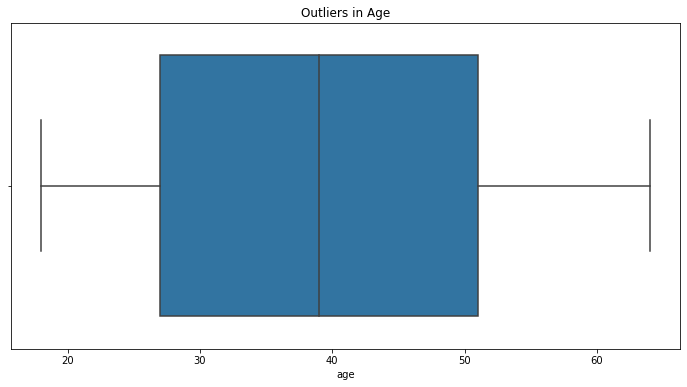

In [50]:
"""
Outliers in Age
"""
plt.figure(figsize=(12,6))
plt.title("Outliers in Age")
sns.boxplot(MetaData['age'])

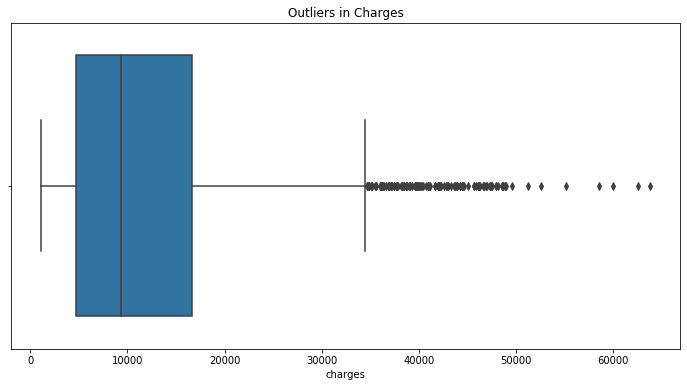

In [51]:
"""
Outliers in Charges
"""
plt.figure(figsize=(12,6))
plt.title("Outliers in Charges")
sns.boxplot(MetaData['charges'])


**h. Distribution of categorical columns (include  children)**

In [52]:
MetaData.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


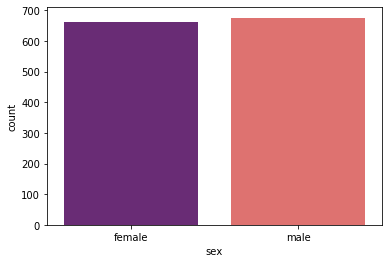

In [110]:
sns.countplot(x='sex',data=MetaData,palette='magma',color='dark')

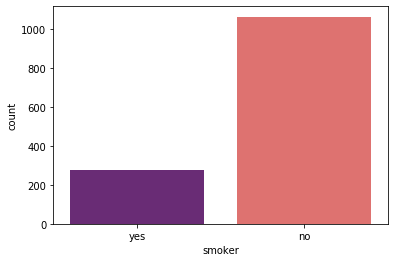

In [111]:
sns.countplot(x='smoker',data=MetaData,palette='magma',color='dark')

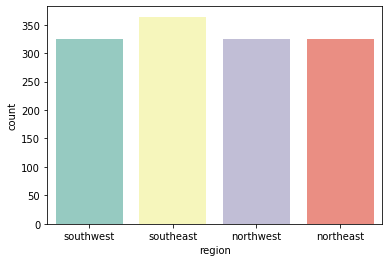

In [112]:
sns.countplot(x='region',data=MetaData,palette='Set3',color='dark')

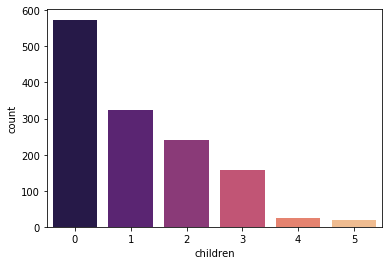

In [113]:
sns.countplot(x='children',data=MetaData,palette='magma',color='dark')

In [114]:
print( MetaData.groupby('children').size())
print(MetaData.groupby('sex').size())
print(MetaData.groupby('smoker').size())
print(MetaData.groupby('region').size())

children
0    574
1    324
2    240
3    157
4     25
5     18
dtype: int64
sex
female    662
male      676
dtype: int64
smoker
no     1064
yes     274
dtype: int64
region
northeast    324
northwest    325
southeast    364
southwest    325
dtype: int64


**i. Pair plot that includes all the columns of the data  frame**

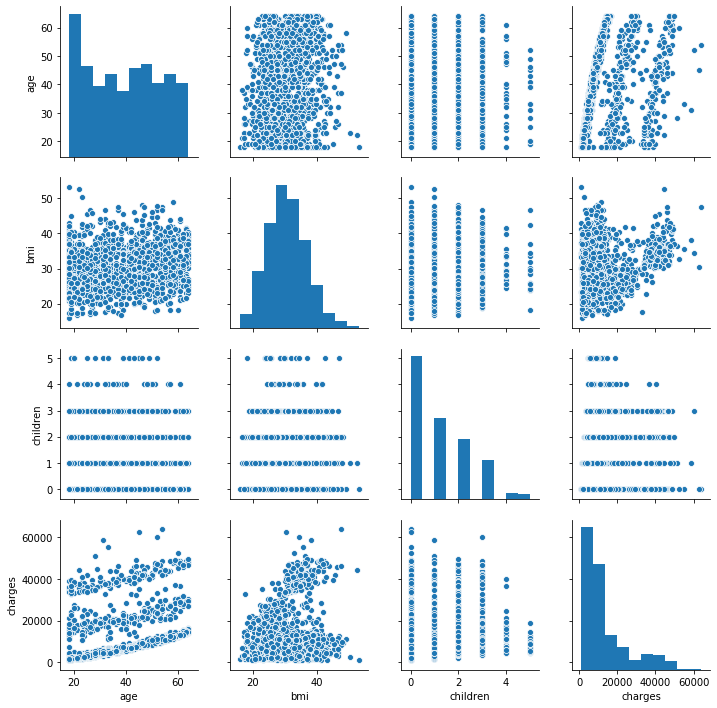

In [56]:
sns.pairplot(MetaData)

**4. Answer the following questions with statistical evidence** 

 **a. Do charges of people who smoke differ significantly  from the people who don't?**

In [57]:
MetaData.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


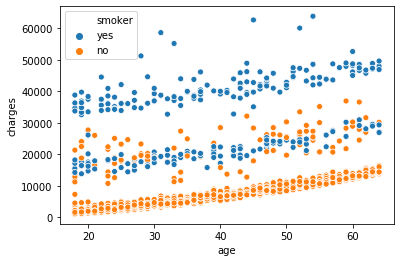

In [58]:
sns.scatterplot(MetaData['age'], MetaData['charges'], hue=MetaData['smoker'])

H0: Charges for smokers = Charges for non-smokers
Ha: Charges for smokers != Charges for non-smokers
This is a two-tailed problem
Since alpha is not given, we will assume it to be 0.05 and as it is two tailed,we will take alpha=0.025 for one side.

In [59]:
"""
As it is two tailed.alpha taken as below
"""

alpha = 0.025

chargesNonsmokers=np.array(MetaData[MetaData['smoker']== 'no']['charges'])

chargesSmokers=np.array(MetaData[MetaData['smoker']=='yes']['charges'])

t, p_value = stats.ttest_ind(chargesNonsmokers, chargesSmokers, axis = 0)

if p_value < alpha:
    print(f'We reject H0 because ({p_value}) < {alpha}')
else:
    print(f'We fail to reject H0 because ({p_value}) > {alpha}')

We reject H0 because (8.271435842177219e-283) < 0.025


**b. Does bmi of males differ significantly from that of  females?** 

In [60]:
MetaData.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


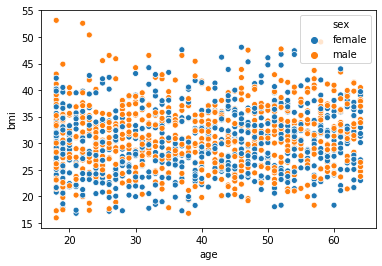

In [69]:
sns.scatterplot(MetaData['age'], MetaData['bmi'], hue=MetaData['sex'])

H0: BMI of male = BMI of female
Ha: BMI of male != BMI of female
This is a two-tailed problem
Since alpha is not given, we will assume it to be 0.05.
As it is two tailed,we will take alpha=0.025 at one side.

In [64]:
MaleBmi=np.array(MetaData[MetaData['sex']=='male']['bmi'])

In [65]:
FemaleBmi=np.array(MetaData[MetaData['sex']=='female']['bmi'])

In [71]:
"""
It is two tailed.Alpha is unknown.will take alpha=0.05.But as it is two tailed,will take single side as alpha=0.025
"""
alpha=0.025
t, p_value = stats.ttest_ind(MaleBmi, FemaleBmi, axis = 0)

if p_value < alpha:
    print(f'We reject H0 because ({p_value}) < {alpha}')
else:
    print(f'We fail to reject H0 because ({p_value}) > {alpha}')

We fail to reject H0 because (0.08997637178984932) > 0.025


**c. Is the proportion of smokers significantly different  in different genders?**

H0: Proportion of smokers is same in different genders.
Ha: Proportion of smokers is different in different genders.
Since alpha is not given, we will assume it to be 0.05.

In [72]:
crossTabData=pd.crosstab(MetaData['smoker'],MetaData['sex'])
crossTabData

sex,female,male
smoker,,
no,547,517
yes,115,159


In [73]:
alpha = 0.05

chi, p_value, dof, expected = stats.chi2_contingency(crossTabData)

if p_value < alpha:
    print(f'We reject H0 because ({p_value}) < {alpha}')
else:
    print(f'We fail to reject H0 because ({p_value}) > {alpha}')

We reject H0 because (0.006548143503580696) < 0.05


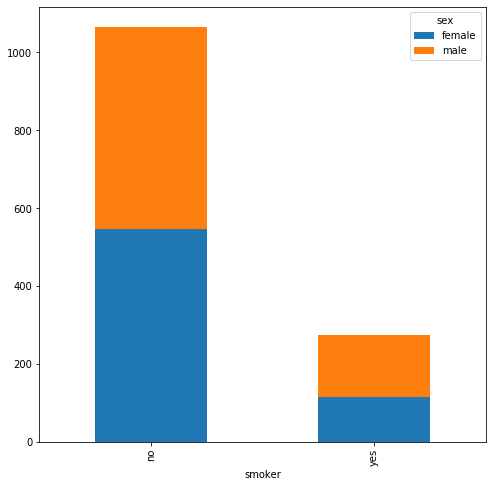

In [77]:
crossTabData.plot(kind="bar", 
                 figsize=(8,8),
                 stacked=True)

In [81]:
MetaDataCategoricalVar=MetaData.groupby(['smoker','sex'])
MetaDataCategoricalVar.size()

smoker  sex   
no      female    547
        male      517
yes     female    115
        male      159
dtype: int64

**d. Is the distribution of bmi across women with no  children, one child and two children, the same ?**

H0: Distribution of BMI across women with no children, one child and two children is different
Ha: Distribution of BMI across women with no children, one child and two children is same

In [82]:
MetaData.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [90]:
Bmi_0_Child=np.array(MetaData[MetaData['children']==0 & (MetaData['sex']=='female')]['bmi'])
Bmi_1_Child=np.array(MetaData[MetaData['children']==1 & (MetaData['sex']=='female')]['bmi'])
Bmi_2_Child=np.array(MetaData[MetaData['children']==0 & (MetaData['sex']=='female')]['bmi'])

t, p_value = stats.f_oneway(Bmi_0_Child, Bmi_1_Child, Bmi_2_Child)

if p_value < alpha:
    print(f'We reject H0 because ({p_value}) < {alpha}')
else:
    print(f'We fail to reject H0 because ({p_value}) > {alpha}')

We fail to reject H0 because (0.9871024901307216) > 0.05


In [115]:
"""
End of the Notebook.Thanks for the Problem Statements.
"""

'\nEnd of the Notebook.Thanks for the Problem Statements.\n'